In [96]:
import pandas as pd
import matplotlib.pyplot as plt
police_killings=pd.read_csv('police_killings.csv', encoding='ISO-8859-1')
police_killings.head(5)

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


Fixing issue in the source dataset - NY state must have "census code" equal to 36, but in original dataset it have set to 48 (record index is 452)

In [97]:
police_killings[(police_killings['state']=='NY')&(police_killings['state_fp']!=36)]['state_fp']

452    48
Name: state_fp, dtype: int64

In [98]:
issue_index=police_killings[(police_killings['state']=='NY')&(police_killings['state_fp']!=36)].index[0]
print('Issue index is', issue_index)

Issue index is 452


In [99]:
police_killings.loc[issue_index, ('state_fp')]=36

In [100]:
police_killings.columns

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')

Shootings by race

In [101]:
counts=police_killings['raceethnicity'].value_counts()

## Racial breakdown

([<matplotlib.axis.XTick at 0x7f26ba0eb1d0>,
 <a list of 6 Text xticklabel objects>)

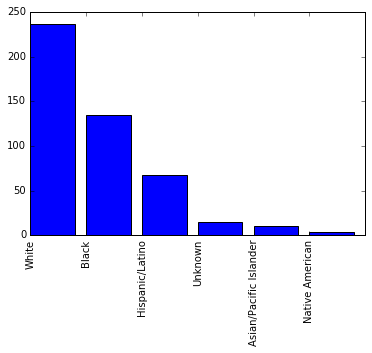

In [102]:
%matplotlib inline
plt.bar(range(6),counts)
plt.xticks(range(6), counts.index, rotation='vertical')

In [103]:
counts/sum(counts)

White                     0.505353
Black                     0.289079
Hispanic/Latino           0.143469
Unknown                   0.032120
Asian/Pacific Islander    0.021413
Native American           0.008565
Name: raceethnicity, dtype: float64

## Shootings By Regional Income

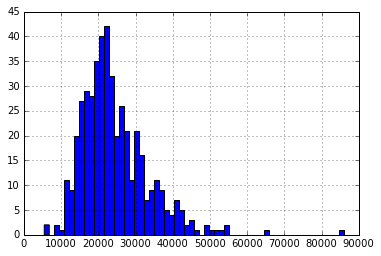

In [104]:
income = police_killings[police_killings['p_income'] != '-']
income['p_income'].astype(dtype = 'int').hist(bins=60)

In [105]:
print('Maximum income of the victime is', income['p_income'].astype(dtype = 'float').max(), 'USD')
print('Medium income of the victime is', income['p_income'].astype(dtype = 'float').median(), 'USD')
print('Minimun income of the victime is', income['p_income'].astype(dtype = 'float').min(), 'USD')


Maximum income of the victime is 86023.0 USD
Medium income of the victime is 22348.0 USD
Minimun income of the victime is 5457.0 USD


In [106]:
state_pop = pd.read_csv('state_population.csv')
#state_pop
counts = income['state_fp'].value_counts()
states = pd.DataFrame({"STATE": counts.index, "shootings": counts})
states = states.merge(state_pop, on="STATE")
states['pop_millions'] = states['POPESTIMATE2015'] / 1000000
states['rate'] = states['shootings'] / states['pop_millions']
states.sort_values(['rate'], ascending=[0])

,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,pop_millions,rate
4,40,22,40,3,7,Oklahoma,3911338,2950017,75.4,3.911338,5.624674
3,4,25,40,4,8,Arizona,6828065,5205215,76.2,6.828065,3.661359
27,31,6,40,2,4,Nebraska,1896190,1425853,75.2,1.896190,3.164240
34,15,4,40,4,9,Hawaii,1431603,1120770,78.3,1.431603,2.794071
39,2,2,40,4,9,Alaska,738432,552166,74.8,0.738432,2.708442
33,16,4,40,4,8,Idaho,1654930,1222093,73.8,1.654930,2.417021
32,35,5,40,4,8,New Mexico,2085109,1588201,76.2,2.085109,2.397956
7,8,12,40,4,8,Colorado,5456574,4199509,77.0,5.456574,2.199182
11,22,10,40,3,7,Louisiana,4670724,3555911,76.1,4.670724,2.140996
41,10,2,40,3,5,Delaware,945934,741548,78.4,0.945934,2.114312


State Oklahoma have most rate in killings and safest state is Connecticut.

## State By State Differences

In [107]:
pk=police_killings[(police_killings['share_white'] != '-') &
                (police_killings['share_black'] != '-') &
                (police_killings['share_hispanic'] != '-')]
pk1=pk.copy()
pk1['share_white']=pk["share_white"].apply(lambda x: pd.to_numeric(x))
pk1['share-black']=pk['share_black'].apply(lambda x: pd.to_numeric(x))
pk1['share-hispanic']=pk['share_hispanic'].apply(lambda x: pd.to_numeric(x))

Get top 10 states with highest and lowest killing rates

In [108]:
highest_state_fp = states.sort_values(['rate'], ascending=[0]).iloc[0:10,0].tolist()
lowest_state_fp = states.sort_values(['rate'], ascending=[1]).iloc[0:10,0].tolist()

lsd = pk1[pk1["state_fp"].isin(lowest_state_fp)]
hsd = pk1[pk1["state_fp"].isin(highest_state_fp)]

columns=["pop", "county_income", "share_white", "share-black", "share-hispanic"]

top 10 states with lowest rates. Mean values.

In [109]:
lsd[columns].mean()

pop                4201.660714
county_income     54830.839286
share_white          60.616071
share-black          21.257143
share-hispanic       12.948214
dtype: float64

top 10 states with highest rates. Mean values.

In [110]:
hsd[columns].mean()

pop                4315.750000
county_income     48706.967391
share_white          55.652174
share-black          11.532609
share-hispanic       20.693478
dtype: float64

Lowest rates top 10 states have lower mean population, but greater mean county_income. 

Lowest rates top 10 states have more victims of white and black people. But highest rates top 10 states have more victims of hispanic people.   

## Gender breakdown

In [111]:
police_killings['gender'].value_counts()

Male      445
Female     22
Name: gender, dtype: int64

Pie chart (shares in percent)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f272885b5c0>], dtype=object)

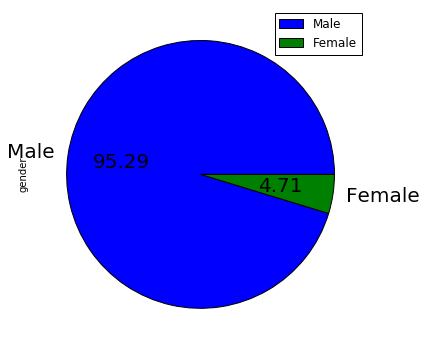

In [112]:
gender_data=pd.DataFrame(police_killings['gender'].value_counts())
gender_data.plot.pie(autopct='%.2f', fontsize=20, subplots=True, figsize=(6, 6))

## How had victims was armed?

In [113]:
count_armed=police_killings['armed'].value_counts()
count_armed/count_armed.sum()*100

Firearm               49.250535
No                    21.841542
Knife                 14.561028
Other                  5.567452
Vehicle                3.854390
Non-lethal firearm     2.997859
Unknown                1.498929
Disputed               0.428266
Name: armed, dtype: float64

Almost one half of victims (49.25%) was Firearm armed. 21% was not armed and 14% had knife.  